Notebook for adversarial training

In [21]:
%load_ext autoreload
%autoreload 2

import gc
import numpy as np
import axelrod as axl
from time import time
from copy import deepcopy
from pprint import pprint
from itertools import permutations

np.set_printoptions(precision=3)

# the following imports are from network / axl_utils folder
import network
from network.dqn import DQN
from network.replay import ReplayMemory
from axl_utils.nnplayer import NNplayer, State, train
from axl_utils.game import set_match, set_play

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
GAME_LEN = 20 + 1
C = axl.Action.C
D = axl.Action.D
Match = set_match(game=axl.Game(r=3, s=0, t=5, p=1), turns=GAME_LEN)
play = set_play(Match)

In [23]:
dqn = DQN([
                    network.Flatten_layer(),
                    network.Linear_layer(GAME_LEN*2, 100, bias=0.01),
                    network.Activation_layer('ReLU'),
                    network.Linear_layer(100, 200),
                    network.Activation_layer('ReLU'),
                    network.Linear_layer(200, 100),
                    network.Activation_layer('ReLU'),
                    network.Linear_layer(100, 40),
                    network.Activation_layer('ReLU'),
                    network.Linear_layer(40, 2),
                    ])
p1 = NNplayer(deepcopy(dqn), ReplayMemory(2000), State(GAME_LEN), gamma=0.9)
dqn.reset()
p2 = NNplayer(deepcopy(dqn), ReplayMemory(2000), State(GAME_LEN), gamma=0.9)
del dqn
gc.collect()

param = {"lr": 1e-5, 'batch': 16, "momentum": 0.9, "mode": "train", "eps": 1e-16, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

Network reinitialized.


In [24]:
play(p1, p2)

[(0, 5), (1, 1), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 5), (0, 5), (3, 3)]
Player 1 score = 9
Player 2 score = 74


In [25]:
[Match((p1, p2)).play() for _ in range(40)]

for _ in range(60):
    
    # get experience
    [Match((p1, p2)).play() for _ in range(20)]
    
    # test strategy
    p1.greedy = p2.greedy = 0
    play(p1, p2)
    p1.greedy = p2.greedy = 0.2
    
    # train
    print("--------training p1--------")
    train(p1, 5, param)
    print("--------training p2--------")
    train(p2, 5, param)

[(0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (3, 3)]
Player 1 score = 3
Player 2 score = 98
--------training p1--------
loss: [0.53  0.888],            time: +6.67 sec
loss: [0.555 0.667],            time: +5.90 sec
loss: [0.549 0.852],            time: +6.71 sec
loss: [0.531 0.635],            time: +6.61 sec
loss: [0.579 0.735],            time: +7.02 sec
--------training p2--------
loss: [0.909 1.121],            time: +6.60 sec
loss: [0.973 1.067],            time: +6.81 sec
loss: [0.825 0.989],            time: +7.11 sec
loss: [0.709 0.932],            time: +6.31 sec
loss: [0.779 0.889],            time: +6.57 sec
[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 5), (0, 5)]
Player 1 score = 18
Player 2 score = 28
--------training p1--------
loss: [0.511 0.822],            tim

KeyboardInterrupt: 

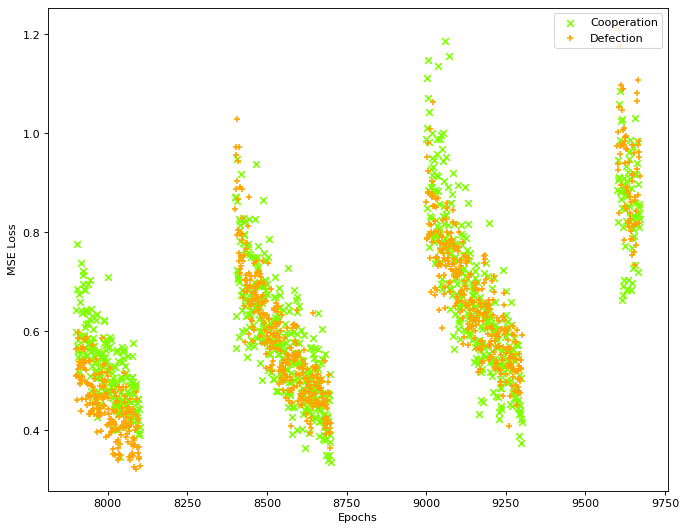

In [31]:
p1.plot(min_ran=4000, max_ran=6000)

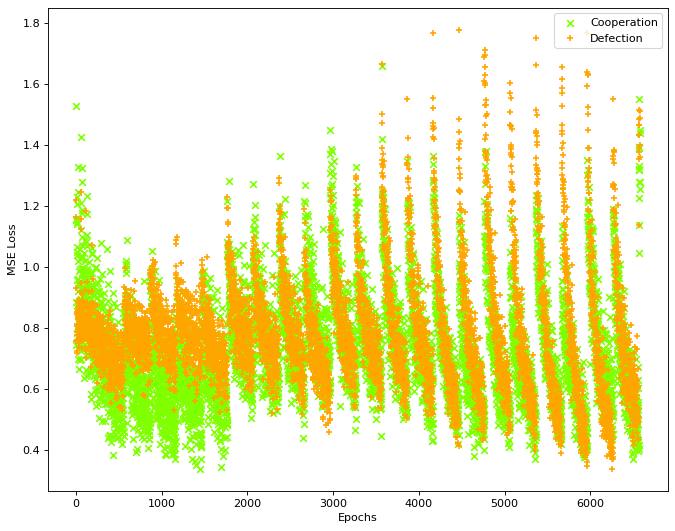

In [14]:
p2.plot()

In [20]:
p1.network == p2.network

True